# Lets Grow More - Virtual Internship Program(VIP) - Data Science Intern

## Task2: Prediction using Decision Tree  Algorithm

Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier,
it would be able to  predict the right class accordingly.

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [18]:
col_name = ['sepal-length','sepal-width','petal-length','petal-width','species']

### Reading and Visualization of data

In [19]:
df=pd.read_csv('C:/Users/user/Downloads/iris.data',names=col_name)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.tail()

,sepal-length,sepal-width,petal-length,petal-width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [21]:
print("Number of cloumns in dataset: ",df.shape[0])
print("Number of rows in dataset: ",df.shape[1])

Number of cloumns in dataset:  150
Number of rows in dataset:  5


In [22]:
df.describe(include='all')

,sepal-length,sepal-width,petal-length,petal-width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [25]:
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

### Exploratory Analysis

In [17]:
species_count = df['species'].value_counts()
labels = species_count.index.tolist()
count = species_count.values.tolist()
species_count.to_frame()

,Spieces
Iris-virginica,50
Iris-setosa,50
Iris-versicolor,50


### showing in Piechart of data

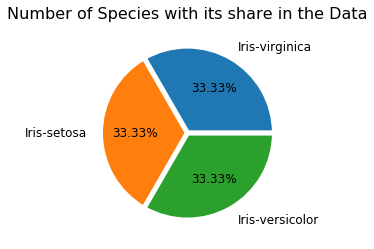

In [35]:
plt.pie(count, labels = labels, labeldistance = 1.15, wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'},
        textprops = {'fontsize' : 12}, autopct = "%1.2f%%")
plt.title("Number of Species with its share in the Data", fontsize = 16)
plt.show()

### Pairplot 

<Figure size 1080x432 with 0 Axes>

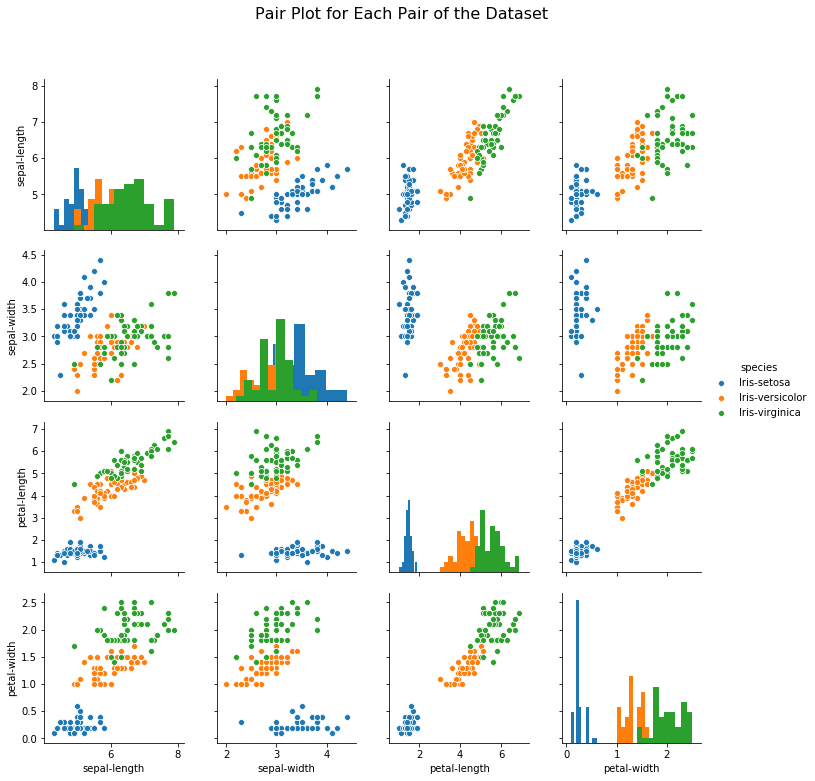

In [38]:
fig =  plt.figure(figsize = (15,6))
visual = sns.pairplot(df, hue =  'species', diag_kind = 'hist')
visual.fig.suptitle("Pair Plot for Each Pair of the Dataset", y = 1.08, fontsize =  16)
plt.show()

### Heatmap

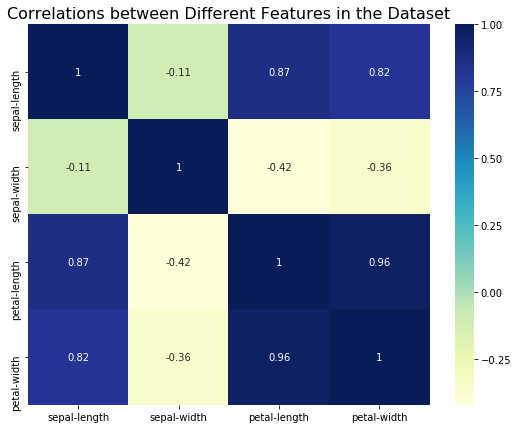

In [41]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.title('Correlations between Different Features in the Dataset',fontsize =  16)
plt.show()

### Preparing of data

In [44]:
X = df.iloc[:, 0:4]
X = X.values
X[0:7]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3]])

In [46]:
Y =  (df.iloc[:, 4])
Y = Y.values
Y[0:7]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [47]:
from sklearn.preprocessing import StandardScaler
std =  StandardScaler()
X = std.fit_transform(X)
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

### Training and Testing the data

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [55]:
from sklearn.tree import DecisionTreeClassifier
iris_tree =  DecisionTreeClassifier(criterion =  "entropy", max_depth =  4)
iris_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [57]:
y_pred = iris_tree.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc_score = accuracy_score(Y_test,y_pred)
print("The accuracy of the Decision Tree Algorithm is : ", str(acc_score*100)+ "%")

The accuracy of the Decision Tree Algorithm is :  96.66666666666667%


In [61]:
iris_cm = confusion_matrix(Y_test, y_pred)
species = df['species'].unique().tolist()
iris_cm = pd.DataFrame(iris_cm, index = species, columns = species)
iris_cm

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,11,0,0
Iris-versicolor,0,12,1
Iris-virginica,0,0,6


In [63]:
from sklearn.tree import plot_tree
columns = df.columns.tolist()
print(columns)

['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']


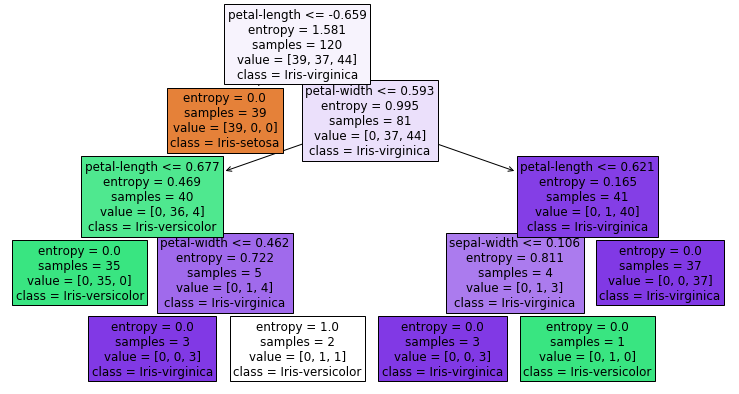

In [65]:
fig = plt.figure(figsize=(13,7))
tree_visual = plot_tree(iris_tree, feature_names = columns,  class_names = species, filled = True)